# ENSF 611 Final Project: Categorizing Jeopardy! Questions Using Clustering
### By Michael Le (UCID: 10104883)

### Context:
Question: Using the clustering models learned in ENSF 611, experiment and explore how effective each of them are in clustering clues from the game show Jeopardy! based on the keywords used in each clue. If the models learned in class are ineffective, see if there are any models that do work.

Motivation: Whenever I watch the game show Jeopardy!, I have always been curious as to which categories and topics appear the most frequently in clues that appear on the show.

Looking at the fan-created archive website J! Archive (https://j-archive.com/), which contains a database of all the clues aired since the debut of the show in 1984, I noticed a definite shift in the writing style of the clues and category names from then to now.

For example, it would be easy to know what the category of an Opera clue is from an episode in 1984, since the category at the top is shown to be “Opera”. However, in a 2021 Opera clue example this is not as clear, since the category is shown as “Aria Grande” – this is a play on the name of the pop singer Ariana Grande and also references the opera term “Aria”, which is self-contained opera piece for one voice. The category name hints at indicates multiple possibilities for what the clue may be
about. The clue content in the 2021 example is also less straightforward and contains trickier writing, making the answer harder to find.

The main point is that the category and content of the clues that appear on the current episodes of Jeopardy! are less obvious and more subtle. Therefore, choosing to separate clues based solely on category name may not be the most reliable way to find out which topics appear the most frequently in clues.

Instead, what if we clustered clues based on keywords used in the clue instead? Would this improve the chances of discovering distinct topics for the clues?

Expectations: As someone who is new to the topic of Machine Learning, I definitely do not expect the clustering models I choose to produce worthwhile results, especially since the clue language is so complex and tricky. This is more of an experimental project for my own curiosity to see first-hand how effective models can be with real-world data.

In [1]:
import pandas as pd # Import Pandas
import numpy as np # Import NumPy
import matplotlib.pyplot as plt # Matplotlib Data Visualization Library
import seaborn as sns # Seaborn Data Visualization Library
import plotly.express as px # Plotly Data Visualization Library

### Step 1: Exploratory Data Analysis - Converting the Clue Data CSV into a DataFrame

In [2]:
# Convert Clue Data CSV into a Pandas DataFrame
df = pd.read_csv('./jeopardy-clue-data.csv')

In [3]:
df.head() # Look at the first 5 rows of the clues

note_id  last modification time  tags  Round  Value Daily Double  \
0  1.648160e+12              1648160659   NaN      1    100           no   
1  1.648160e+12              1648160659   NaN      1    200           no   
2  1.648160e+12              1648160659   NaN      1    800          yes   
3  1.648160e+12              1648160659   NaN      1    400           no   
4  1.648160e+12              1648160659   NaN      1    500           no   

         Category Comments                                           Question  \
0  LAKES & RIVERS        -            River mentioned most often in the Bible   
1  LAKES & RIVERS        -                             Scottish word for lake   
2  LAKES & RIVERS        -                         River in this famous song:   
3  LAKES & RIVERS        -  American river only 33 miles shorter than the ...   
4  LAKES & RIVERS        -  World's largest lake, nearly 5 times as big as...   

            Answer    Air Date Notes  
0       the Jordan  1984-09-10     -  
1             loch  1984-09-10     -  
2  the Volga River  1984-09-10     -  
3     the Missouri  1984-09-10     -  
4  the Caspian Sea  1984-09-10     -

In [4]:
# Drop unnecessary columns and create a new DataFrame called clues_df with the columns I want to keep
clues_df = df.drop(columns=["note_id", "last modification time", "tags", "Comments", "Notes"], inplace=False)
# Add column called year that will contain year of the airdate
clues_df['Year'] = pd.DatetimeIndex(clues_df['Air Date']).year
# View first 20 clues from 1984
clues_df.head(20)

Round  Value Daily Double         Category  \
0       1    100           no   LAKES & RIVERS   
1       1    200           no   LAKES & RIVERS   
2       1    800          yes   LAKES & RIVERS   
3       1    400           no   LAKES & RIVERS   
4       1    500           no   LAKES & RIVERS   
5       1    100           no       INVENTIONS   
6       1    200           no       INVENTIONS   
7       1    300           no       INVENTIONS   
8       1    400           no       INVENTIONS   
9       1    100           no          ANIMALS   
10      1    200           no          ANIMALS   
11      1    300           no          ANIMALS   
12      1    400           no          ANIMALS   
13      1    500           no          ANIMALS   
14      1    100           no  FOREIGN CUISINE   
15      1    200           no  FOREIGN CUISINE   
16      1    300           no  FOREIGN CUISINE   
17      1    400           no  FOREIGN CUISINE   
18      1    100           no   ACTORS & ROLES   
19      1    200           no   ACTORS & ROLES   

                                             Question  \
0             River mentioned most often in the Bible   
1                              Scottish word for lake   
2                          River in this famous song:   
3   American river only 33 miles shorter than the ...   
4   World's largest lake, nearly 5 times as big as...   
5                        Marconi's wonderful wireless   
6   "In 1869 an American minister created this ""o...   
7   A 1920's hunting trip to Canada inspired Birds...   
8   This fastener gets its name from a brand of ga...   
9   These rodents first got to America by stowing ...   
10  There are about 40,000 muscles & tendons in th...   
11  "When husbands ""pop"" for an ermine coat, the...   
12  "Close relative of the pig, though its name me...   
13  If this species of hybrid's parents were rever...   
14                        "The ""coq"" in coq au vin"   
15  "A British variety is called ""bangers"", a Me...   
16                    Jewish crepe filled with cheese   
17  French for a toothsome cut of beef served to a...   
18  Video in which Michael Jackson plays a werewol...   
19  "2 ""Saturday Night"" alumni who tried ""Tradi...   

                        Answer    Air Date  Year  
0                   the Jordan  1984-09-10  1984  
1                         loch  1984-09-10  1984  
2              the Volga River  1984-09-10  1984  
3                 the Missouri  1984-09-10  1984  
4              the Caspian Sea  1984-09-10  1984  
5                    the radio  1984-09-10  1984  
6                 the rickshaw  1984-09-10  1984  
7                     freezing  1984-09-10  1984  
8                     a zipper  1984-09-10  1984  
9                         rats  1984-09-10  1984  
10                   the trunk  1984-09-10  1984  
11                    a weasel  1984-09-10  1984  
12            the hippopotamus  1984-09-10  1984  
13                        mule  1984-09-10  1984  
14                     chicken  1984-09-10  1984  
15                    sausages  1984-09-10  1984  
16                    a blintz  1984-09-10  1984  
17               Châteaubriand  1984-09-10  1984  
18            "\""Thriller\"""  1984-09-10  1984  
19  Dan Aykroyd & Eddie Murphy  1984-09-10  1984

In [5]:
# View 10 most recent clues from 2021
clues_df.tail(10)

Round  Value Daily Double                     Category  \
389435      2    400           no                         LOST   
389436      2    800           no                         LOST   
389437      2   1200           no                         LOST   
389438      2   1600           no                         LOST   
389439      2   5000          yes                         LOST   
389440      2    400           no                      FOUNDRY   
389441      2    800           no                      FOUNDRY   
389442      2   1200           no                      FOUNDRY   
389443      2   1600           no                      FOUNDRY   
389444      3      0           no  19th CENTURY AMERICAN WOMEN   

                                                 Question  \
389435  "Idiomatically, if you've ""lost"" these small...   
389436  "Something overlooked has been ""lost in"" thi...   
389437  Art Fleming & Don Pardo were in the video for ...   
389438  "In ""A Moveable Feast"", Gertrude Stein is qu...   
389439  The biblical Asher & Zebulun were 2 of these t...   
389440  This hefty noisemaker from Whitechapel Foundry...   
389441  Around 4,000 years ago, the first foundries in...   
389442  Several different foundries worked for 4 month...   
389443  Once one of the largest of its kind, the Gary ...   
389444  2 of the 3 women depicted on the first statue ...   

                                                   Answer    Air Date  Year  
389435                                            marbles  2021-08-13  2021  
389436                                        the shuffle  2021-08-13  2021  
389437                         "\""I Lost On Jeopardy\"""  2021-08-13  2021  
389438                                    Lost Generation  2021-08-13  2021  
389439                          the lost tribes of Israel  2021-08-13  2021  
389440                                            Big Ben  2021-08-13  2021  
389441                                             bronze  2021-08-13  2021  
389442                                            Monitor  2021-08-13  2021  
389443                                         U.S. Steel  2021-08-13  2021  
389444  (2 of) (Sojourner) Truth, (Susan B.) Anthony, ...  2021-08-13  2021

In [6]:
clues_df.columns # Check columns of clues_df

Index(['Round', 'Value', 'Daily Double', 'Category', 'Question', 'Answer',
       'Air Date', 'Year'],
      dtype='object')

In [7]:
clues_df.shape # Check the number of rows and columns in clues_df

(389445, 8)

In [8]:
# Number of unique categories?
num_unique_categories = len(clues_df['Category'].unique())
print(f"Number of unique categories: {num_unique_categories}")

Number of unique categories: 47712


In [9]:
# Check Column Names and Types:
print(f"Column Types: \n{clues_df.dtypes}\n")

Column Types: 
Round            int64
Value            int64
Daily Double    object
Category        object
Question        object
Answer          object
Air Date        object
Year             int64
dtype: object



In [10]:
# 100 Most Common Answers?
pd.set_option('display.max_rows', 100)
most_common_answers = clues_df['Answer'].value_counts()[0:100]
most_common_answers

Australia             355
Chicago               349
China                 343
France                328
Japan                 319
California            301
India                 301
Spain                 298
Canada                284
Alaska                277
Mexico                271
Texas                 253
Florida               252
Italy                 246
Hawaii                242
Brazil                241
Paris                 237
Russia                232
New York              231
South Africa          230
Ireland               223
Germany               221
Egypt                 219
Boston                217
Greece                217
New Orleans           214
Sweden                213
London                212
Virginia              196
San Francisco         196
Switzerland           194
Georgia               192
Maine                 181
George Washington     180
Massachusetts         180
Philadelphia          178
Cuba                  176
Norway                176
New Zealand 

In [11]:
# Create a DataFrame with the top 10 most common answers, and rename the columns to 'Answer' and 'Count'
top_10_answers_df = most_common_answers[0:10].sort_values(ascending=True).rename_axis("Answer").reset_index(name="Count")

# Create horizontal bar graph with Plotly
h_bar = px.bar(x = top_10_answers_df["Count"],
                y = top_10_answers_df["Answer"],
                orientation='h',
                color=top_10_answers_df["Count"],
                color_continuous_scale='Viridis',
                title='Jeopardy! Clues from 1984 to 2021: Top 10 Most Common Answers')
  
h_bar.update_layout(xaxis_title='Count', yaxis_title='Answer', coloraxis_showscale=True)
h_bar.show()

### Takeaways:
From the list of the top 100 most common answers, a lot of clues appear to be heavily based around world and U.S. geography (all answers in the top 10 most common answers are about geography) and U.S. presidents, as well as famous historical figures, space, and Shakesphere. Let's see if this correlates with the most common categories.

In [12]:
# 100 Most Common Categories?
most_common_categories = clues_df['Category'].value_counts()
most_common_categories.head(100)

SCIENCE                    966
AMERICAN HISTORY           897
LITERATURE                 858
POTPOURRI                  790
HISTORY                    786
WORD ORIGINS               713
BEFORE & AFTER             710
SPORTS                     705
WORLD HISTORY              671
WORLD GEOGRAPHY            657
BUSINESS & INDUSTRY        607
TRANSPORTATION             607
U.S. CITIES                603
RELIGION                   571
COLLEGES & UNIVERSITIES    562
ART                        554
ANIMALS                    544
BODIES OF WATER            535
WORLD CAPITALS             529
U.S. GEOGRAPHY             522
BOOKS & AUTHORS            520
AUTHORS                    514
U.S. HISTORY               512
ISLANDS                    505
LANGUAGES                  494
STATE CAPITALS             492
RHYME TIME                 485
MYTHOLOGY                  479
THE BIBLE                  478
GEOGRAPHY                  474
SHAKESPEARE                471
HODGEPODGE                 471
FOOD    

In [13]:
# Create a DataFrame with the top 10 most common categories, and rename the columns to 'Category' and 'Count'
top_10_categories_df = most_common_categories[0:10].sort_values(ascending=True).rename_axis("Category").reset_index(name="Count")

# Create horizontal bar graph with Plotly
h_bar = px.bar(x = top_10_categories_df["Count"],
                y = top_10_categories_df["Category"],
                orientation='h',
                color=top_10_categories_df["Count"],
                color_continuous_scale='Viridis',
                title='Jeopardy! Clues from 1984 to 2021: Top 10 Most Common Categories')
  
h_bar.update_layout(xaxis_title='Count', yaxis_title='Category', coloraxis_showscale=True)
h_bar.show()

### Takeaways:
It is interesting that Science, Literature, Word Origins, Before & After, and Sports are among the top categories, as I probably would not have guessed this based off the earlier results for the most common answers. I expected World and U.S. Geography and World History to be at the very top of this list, based off the most common answers. This also hints at a discrpency between the clue content and the clue category that I talked about at the start of this notebook.

Just for fun: let's look at the most common questions to see if there is any repeated clues.

In [14]:
# Most Common Questions?
most_common_questions = clues_df['Question'].value_counts()
most_common_questions.head(100)

Walk like a duck                                                                         5
[sports logo]                                                                            5
[flag]                                                                                   5
[theme music]                                                                            5
[State outline]                                                                          5
Egypt                                                                                    5
"\""I Hope I Get It\"""                                                                  5
[instrumental]                                                                           5
Brazil                                                                                   4
Mongolia                                                                                 4
Mount Ararat                                                                             4

### Takeaways:
If we look at the most common questions, we can see questions like [flag], [State outline], [theme music], [sports logo], [instrumental], or [music plays] - these are most likely audio or video clues instead of written clues. 

We should drop all rows with these audio or video clues. This leads us to the next step: Data Cleaning.

### Step 2: Data Cleaning - Searching for Missing or Faulty Clues

In [15]:
# Check for null values
clues_df.isnull().sum() 

Round           0
Value           0
Daily Double    0
Category        0
Question        0
Answer          0
Air Date        0
Year            0
dtype: int64

There are no null values in our dataset!

In [16]:
# Create DataFrames that contain [flag], [State outline], [theme music], [sports logo], [instrumental], and [music plays] 
flag_clues_df = clues_df[clues_df['Question'] == ('[flag]')]
state_outline_clues_df = clues_df[clues_df['Question'] == ('[State outline]')]
theme_music_clues_df = clues_df[clues_df['Question'] == ('[theme music]')]
sports_logo_clues_df = clues_df[clues_df['Question'] == ('[sports logo]')]
instrumental_clues_df = clues_df[clues_df['Question'] == ('[instrumental]')]
music_plays_clues_df = clues_df[clues_df['Question'] == ('[Music plays]')]

# Drop all rows with the [flag], [State outline], [theme music], [sports logo], [instrumental], and [music plays] audio and 
# video clues
clues_df.drop(flag_clues_df.index, inplace = True) 
clues_df.drop(state_outline_clues_df.index, inplace = True)
clues_df.drop(theme_music_clues_df.index, inplace = True)
clues_df.drop(sports_logo_clues_df.index, inplace = True)
clues_df.drop(instrumental_clues_df.index, inplace = True)
clues_df.drop(music_plays_clues_df.index, inplace = True)

print("Indices of clues that were dropped:")
print(flag_clues_df.index)
print(state_outline_clues_df.index)
print(theme_music_clues_df.index)
print(sports_logo_clues_df.index)
print(instrumental_clues_df.index)
print(music_plays_clues_df.index)

Indices of clues that were dropped:
Int64Index([82475, 82476, 82477, 82478, 82479], dtype='int64')
Int64Index([125524, 125525, 125526, 125527, 125528], dtype='int64')
Int64Index([81229, 81230, 81231, 81232, 81233], dtype='int64')
Int64Index([78028, 78029, 78030, 78031, 78032], dtype='int64')
Int64Index([73930, 73931, 73932, 73933, 73934], dtype='int64')
Int64Index([11150, 11151, 11152, 11153], dtype='int64')


In [17]:
# Reset the indices in clues_df, so there are no gaps 
clues_df.reset_index(drop=True, inplace=True)
# Choose a few of the random indices that was dropped and check that there is a question for each of them
# after resetting the index
print(clues_df["Question"][81229])
print(clues_df["Question"][11150])
print(clues_df["Question"][125528])

"1846 saw the height of this Irish ""Blight\"""
As I walk along, I wonder / A what went wrong with our love / A love that was so strong...
"Berthe Morisot, the first female impressionist, was the sister-in-law of this ""Luncheon on the Grass"" painter"


In [19]:
# Check the number of rows in clues_df after dropping all rows with audio/video clues
clues_df.shape

(389416, 8)

Compared to the 389445 rows found earlier, there are now 389416 rows in clues_df. 

Dropping all rows with purely audio/video clues cut 29 clues from our dataset.

With 389416 questions and 47712 'unique' categories (although some of these categories like U.S. History, History, and World History are essentially the same), let's see how the clustering models learned in ENSF 611 are effective in grouping the clues based off their keywords.

### Step 3: Pre-Processing - More Cleaning and Feature Engineering on Text Data Using CountVectorizer and TF-IDF

First, let's add another column in our clues_df called 'Processed Question' that will be in lower case letters and have special characters removed, which will help us implement a bag-of-words representation later.

In [20]:
# Create a new field in clues_df called Processed Question that will be a 'cleaner' version of the 'Question' field and used
# for the clustering models
clues_df['Processed Question'] = clues_df['Question']
clues_df.head()

Round  Value Daily Double        Category  \
0      1    100           no  LAKES & RIVERS   
1      1    200           no  LAKES & RIVERS   
2      1    800          yes  LAKES & RIVERS   
3      1    400           no  LAKES & RIVERS   
4      1    500           no  LAKES & RIVERS   

                                            Question           Answer  \
0            River mentioned most often in the Bible       the Jordan   
1                             Scottish word for lake             loch   
2                         River in this famous song:  the Volga River   
3  American river only 33 miles shorter than the ...     the Missouri   
4  World's largest lake, nearly 5 times as big as...  the Caspian Sea   

     Air Date  Year                                 Processed Question  
0  1984-09-10  1984            River mentioned most often in the Bible  
1  1984-09-10  1984                             Scottish word for lake  
2  1984-09-10  1984                         River in this famous song:  
3  1984-09-10  1984  American river only 33 miles shorter than the ...  
4  1984-09-10  1984  World's largest lake, nearly 5 times as big as...

In [21]:
# Use Regex to get rid of all special characters
import re # Import Regex

# Replace the leftmost non-overlapping occurrences of '[^A-Za-z0-9]+' in 'Processed Question' with ' '
clues_df['Processed Question'] = [re.sub('[^A-Za-z0-9]+', ' ', word) for word in clues_df['Processed Question']]
# Replace the leftmost non-overlapping occurrences of '[^A-Za-z0-9]+' in 'Answer' with ' '
clues_df['Answer'] = [re.sub('[^A-Za-z0-9]+', ' ', word) for word in clues_df['Answer']]

In [22]:
# Use Lemmatizer to group together the inflected forms of a word so they can be analysed as a single item
# For example, the words 'walk', 'walked', 'walks' or 'walking' will be all converted to the base form (the Lemma), 'walk'

import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
clues_df['Processed Question'] = [lemmatizer.lemmatize(word) for word in clues_df['Processed Question']]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\milec\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
# Convert all letters in 'Processed Question' and 'Answer' to lower case
clues_df['Processed Question'] = [word.lower() for word in clues_df['Processed Question']]
clues_df['Answer'] = [word.lower() for word in clues_df['Answer']]

Next, let's check how some of the processed questions look compared to the original version:

In [24]:
# Check the results of the above cleaning: find some cleaned questions and compare them to their original question 
print('Original Question:', clues_df['Question'][clues_df.shape[0] - 1])
print('New Cleaned Question:', clues_df['Processed Question'][clues_df.shape[0] - 1])
print('Answer:', clues_df['Answer'][clues_df.shape[0] - 1])

print('\n')
print('Original Question:', clues_df['Question'][clues_df.shape[0]/2])
print('New Cleaned Question:', clues_df['Processed Question'][clues_df.shape[0]/2])
print('Answer:', clues_df['Answer'][clues_df.shape[0]/2])

print('\n')
print('Original Question:', clues_df['Question'][29])
print('New Cleaned Question:', clues_df['Processed Question'][29])
print('Answer:', clues_df['Answer'][29])

Original Question: 2 of the 3 women depicted on the first statue of real women in Central Park, unveiled in August 2020
New Cleaned Question: 2 of the 3 women depicted on the first statue of real women in central park unveiled in august 2020
Answer:  2 of sojourner truth susan b anthony or elizabeth cady stanton


Original Question: This plant, Gaultheria procumbens, produces an oil used in medicine & as a flavoring
New Cleaned Question: this plant gaultheria procumbens produces an oil used in medicine as a flavoring
Answer: wintergreen


Original Question: "She was ""Our Miss Brooks\"""
New Cleaned Question:  she was our miss brooks 
Answer: eve arden


I'm pretty satisfied with how the questions have been cleaned. Special characters like quotation marks, commas, and backslashes have been removed, and all words have been converted to lower case.

Next, let's convert the text features in the "Processed Questions" column to numerical features based on how often they appear in the clue set using CountVectorizer. Let's ignore words that appear in less than 10% of the clues, since these words appear too infrequently and are unlikely to help our models.

In [25]:
# Convert text to a set of representative numerical values using CountVectorizer
# Vectorization of data based on word count

from sklearn.feature_extraction.text import CountVectorizer

# min_df is used for removing terms that appear too infrequently. 
# max_df is used for removing terms that appear too frequently.
# For example: min_df = 0.10 means "ignore terms that appear in less than 10% of the documents".
# max_df = 0.75 means "ignore terms that appear in more than 75% of the documents".
vec = CountVectorizer(min_df = .1) # Ignore terms that appear in less than 10% of the documents
# Sparse matrix recording number of times each word appears
X = vec.fit_transform(clues_df["Processed Question"])

# Convert sparse matrix to a dense representation using toarray(), then convert it to a dataFrame and use 
# get_feature_names_out to get output feature names to be used as column names. 
count_vectorized_df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
count_vectorized_df

for  in  is  it  of  on  the  this  to  was
0         0   1   0   0   0   0    1     0   0    0
1         1   0   0   0   0   0    0     0   0    0
2         0   1   0   0   0   0    0     1   0    0
3         0   0   0   0   0   0    1     0   0    0
4         0   0   0   0   0   0    0     0   0    0
...     ...  ..  ..  ..  ..  ..  ...   ...  ..  ...
389411    1   1   0   0   0   0    0     1   0    0
389412    0   1   0   0   0   0    1     1   0    0
389413    1   0   0   0   0   0    1     1   1    0
389414    0   1   1   0   3   0    2     1   0    0
389415    0   2   0   0   2   1    2     0   0    0

[389416 rows x 10 columns]

Before I can consider using this dataset, I should reduce its dimensions and keep only the most important features. How many components should I use?  This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

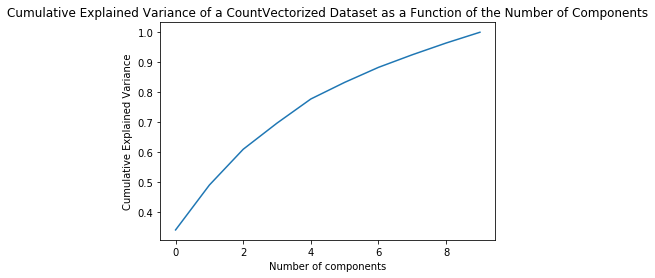

In [26]:
from sklearn.decomposition import PCA
pca = PCA().fit(count_vectorized_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance of a CountVectorized Dataset as a Function of the Number of Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance');

How many components are needed to describe the data?
From the curve, approximately 90% of the total variance is contained within the first 6 components.
The first 4 components contain approximately 75% of the variance, while 9 components are needed to describe close to 100% of the variance.

For now, I will choose 2 components to avoid overfitting the data and to avoid long computational times. Let's visualize the CountVectorized data after running it through PCA:

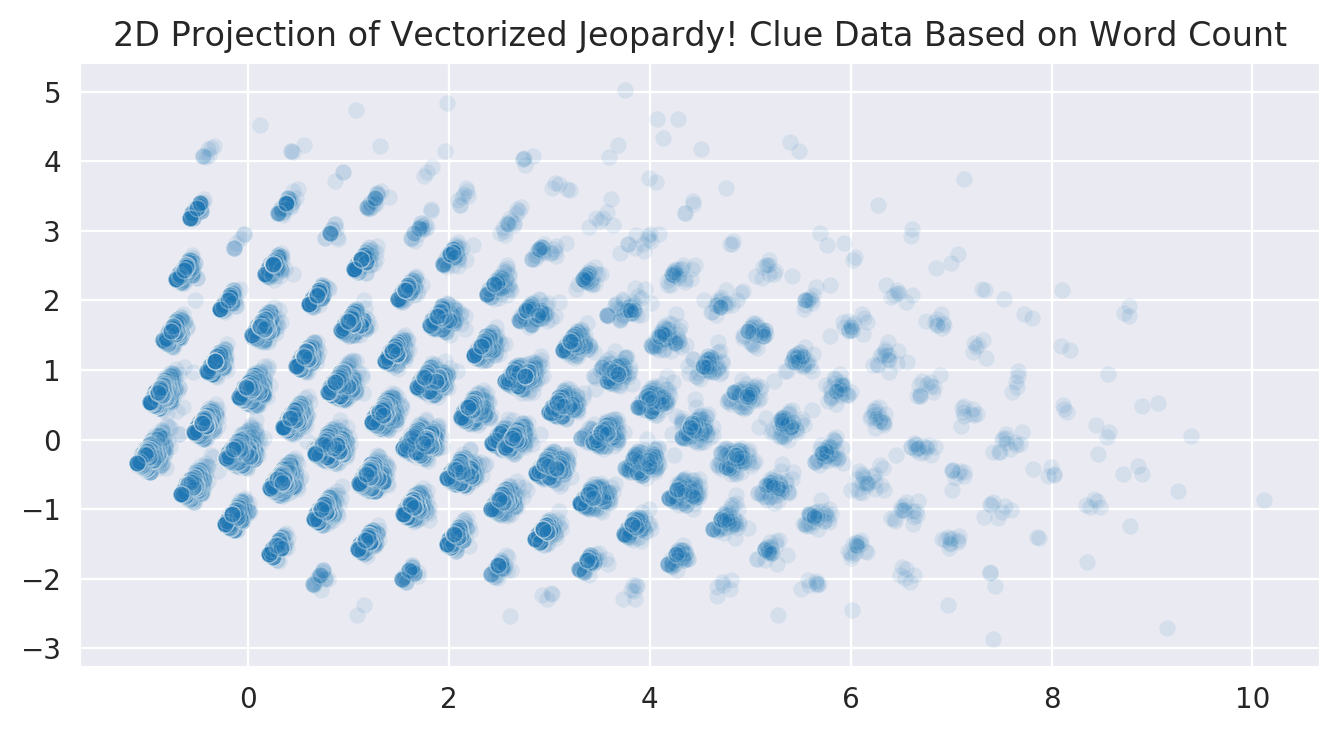

In [27]:
# Reduce dimensionality of count_vectorized_df before running it through KMeans, GMM, DBSCAN, and Agglomerative Clustering

pca = PCA(n_components=2).fit(count_vectorized_df) 
count_vectorized_2D = pca.transform(count_vectorized_df)

# Visualize 2D projection of the count_vectorized data
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(x=count_vectorized_2D[:,0], y=count_vectorized_2D[:,1], alpha=0.1)
  ax.set(title="2D Projection of Vectorized Jeopardy! Clue Data Based on Word Count") 


In [28]:
# Put PCA'd 2-D Representation Features into a DataFrame
count_vectorized_2D_df = pd.DataFrame(count_vectorized_2D)
count_vectorized_2D_df

0         1
0      -0.088763  0.614795
1      -1.096809 -0.353105
2      -0.898863  0.678126
3      -0.219336 -0.267511
4      -1.103361 -0.340951
...          ...       ...
389411 -0.892311  0.665972
389412 -0.014839  0.751566
389413 -0.114776 -0.107211
389414  2.225026 -0.521971
389415  1.833389  0.690073

[389416 rows x 2 columns]

Before I consider running my CountVectorized 2D dataset through the different clustering models, let's also consider an alternative way of rescaling features: Term Frequency–Inverse Document Frequency (TF-IDF). This method gives a high weight to any term that appears often in a particular document, but not in many documents in the corpus - so if a word appears often in a particular document, but not in very many documents, it is likely to be very descriptive of the content of that document.

Let's see how different my dataset would look if I used TFIDF Vectorizer and PCA.
Because my comptuer cannot use all 389420 samples from the original dataset in the TfidfVectorizer, I randomly sample 5000 samples before fitting - even 10000/20000 samples were too large!

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
import random

# Randomly sample a dataset of 5000 clues from the original dataset
random_clues_sample = random.sample(list(clues_df["Processed Question"]), 5000)

# Discarding words in Scikit-Learn has a built-in list of English stopwords are too frequent to be informative
vec = TfidfVectorizer(stop_words = "english")
X = vec.fit_transform(random_clues_sample)
# Sparse matrix recording number of times each word appears

# Convert sparse matrix to a dense representation using toarray(), then convert it to a dataFrame and use 
# get_feature_names_out to get output feature names to be used as column names. 
tfidf_vectorized_df = pd.DataFrame(X.astype(np.uint8).toarray(), columns=vec.get_feature_names_out())
tfidf_vectorized_df

000  000th  04  07  087  10  100  1000  1000s  1004  ...  zola  zollern  \
0       0      0   0   0    0   0    0     0      0     0  ...     0        0   
1       0      0   0   0    0   0    0     0      0     0  ...     0        0   
2       0      0   0   0    0   0    0     0      0     0  ...     0        0   
3       0      0   0   0    0   0    0     0      0     0  ...     0        0   
4       0      0   0   0    0   0    0     0      0     0  ...     0        0   
...   ...    ...  ..  ..  ...  ..  ...   ...    ...   ...  ...   ...      ...   
4995    0      0   0   0    0   0    0     0      0     0  ...     0        0   
4996    0      0   0   0    0   0    0     0      0     0  ...     0        0   
4997    0      0   0   0    0   0    0     0      0     0  ...     0        0   
4998    0      0   0   0    0   0    0     0      0     0  ...     0        0   
4999    0      0   0   0    0   0    0     0      0     0  ...     0        0   

      zombie  zone  zoo  zoolatry  zoological  zoologischer  zorros  \
0          0     0    0         0           0             0       0   
1          0     0    0         0           0             0       0   
2          0     0    0         0           0             0       0   
3          0     0    0         0           0             0       0   
4          0     0    0         0           0             0       0   
...      ...   ...  ...       ...         ...           ...     ...   
4995       0     0    0         0           0             0       0   
4996       0     0    0         0           0             0       0   
4997       0     0    0         0           0             0       0   
4998       0     0    0         0           0             0       0   
4999       0     0    0         0           0             0       0   

      zuckerberg  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           0  

[5000 rows x 13138 columns]

Again, I should reduce the dimensions of this matrix and keep only the most important features. Let's see how the 2D representation of this TFIDFVectorized data looks in comparison to the 2D representation of the CountVectorized data:

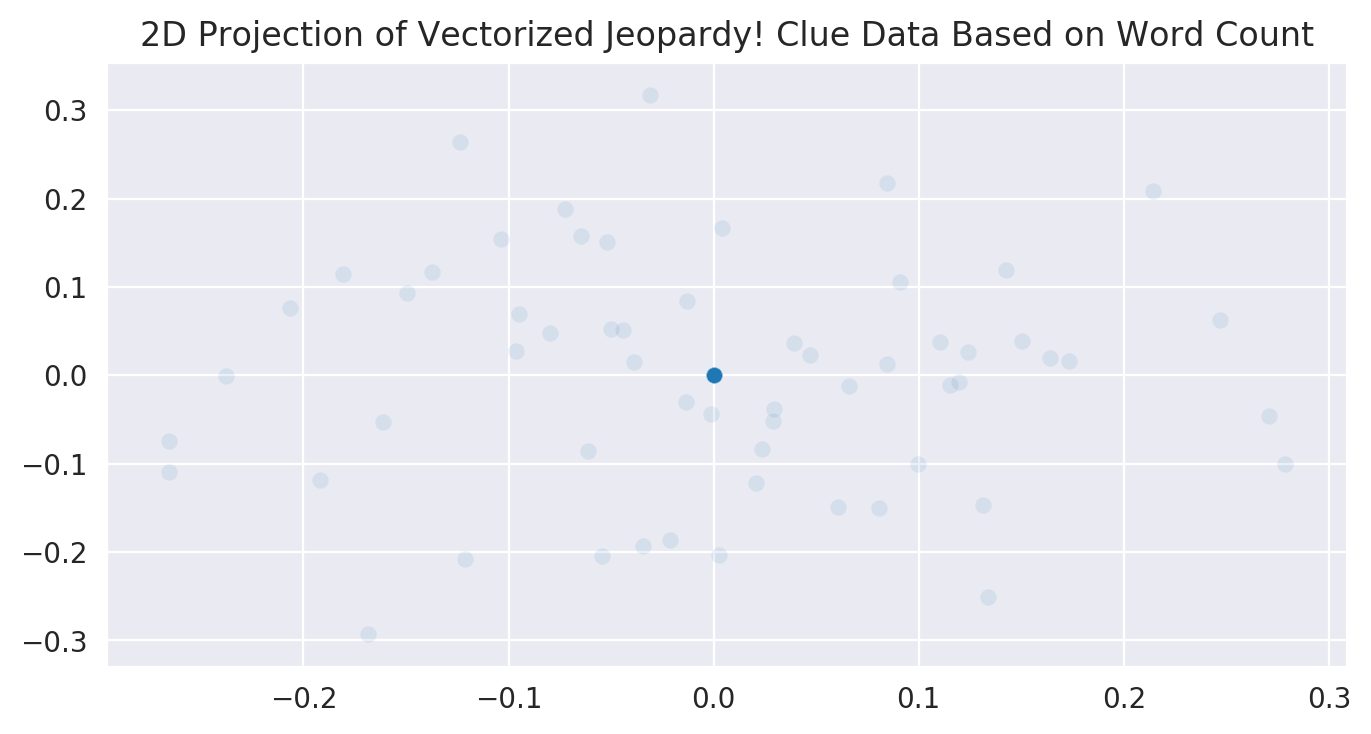

In [30]:
# Reduce dimensionality of tfidf_vectorized_df before running it through KMeans, GMM, DBSCAN, and Agglomerative Clustering

pca = PCA(n_components=2).fit(tfidf_vectorized_df) 
tfidf_vectorized_2D = pca.transform(tfidf_vectorized_df)

# Visualize 2D projection of the tfidf_vectorized data
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(x=tfidf_vectorized_2D[:,0], y=tfidf_vectorized_2D[:,1], alpha=0.1)
  ax.set(title="2D Projection of Vectorized Jeopardy! Clue Data Based on Word Count")

Compared to the 2D representation of my CountVectorized data, this doesn't look good - most of the points appear to be concentrated in one spot, and there isn't a wide variance being shown. I would love to try this with more data samples, but I do not have enough memory to even do 10000 samples.

Therefore I will use the 2D CountVectorized data for my clustering. This is probably the better approach anyways, since I think the common words matter in this case and I am looking for words that are common in many documents, not just one like in TFIDF. 

### Step 4: Cluster CountVectorized Data - KMeans, Gaussian Mixture, DBSCAN, and Agglomerative

### Step 4.1: KMeans

Let's start with KMeans clustering. How many clusters should I use? Let's try the Elbow Method with distortion/inertia values:

NOTE: The code block takes 5-10 minutes to load

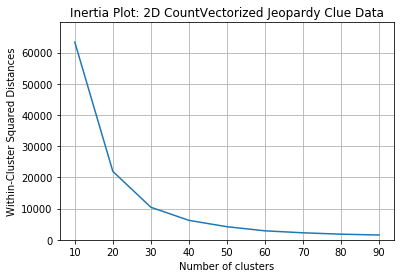

In [31]:
# How many clusters to use?
# Using the Elbow method: Find point with maximum curverature in the score plot.
from sklearn.cluster import KMeans

inertia = [] # Array for inertias to be plotted

# For each number of clusters from 10 to 100, produce a K-Means model and append the inertia to the interia array
for n_clusters in range(10, 100, 10):
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=0).fit(count_vectorized_2D)
    inertia.append(kmeans_model.inertia_)
    
# Convert inertia array to a DataFrame
inertias = pd.DataFrame({'n_clusters': range(10, 100, 10), 'inertia': inertia})
# Plot Inertias
ax = inertias.plot(x='n_clusters', y='inertia')
plt.title("Inertia Plot: 2D CountVectorized Jeopardy Clue Data")
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
plt.grid(True)
ax.legend().set_visible(False)

Using the Elbow method means finding the point with the maximum curvature in the above plot. Since the curve decreases at a steadier pace from 30 clusters onwards, I will choose this number for my model.

In [32]:
# Train K-Means model
kmeans_model = KMeans(n_clusters=30, random_state=0)
kmeans_model.fit(count_vectorized_2D_df)
cluster_labels = kmeans_model.predict(count_vectorized_2D_df)

Let's grab the coordinates of our cluster centers and put them into a DataFrame:

In [33]:
cluster_centers = kmeans_model.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers)
cluster_centers_df

0         1
0   6.177057 -0.003436
1  -0.147438 -0.185781
2   1.702319 -0.063453
3  -1.052351 -0.276098
4   2.238073  1.599707
5  -0.035773  0.743502
6  -0.900750  0.645895
7   0.290442 -0.612844
8   0.109567  1.617774
9   1.178663 -0.540418
10 -0.600660 -0.693741
11  0.876922  0.785844
12  2.731641 -0.886915
13  0.767690 -0.119380
14 -0.767620  1.540634
15  0.421735  0.282901
16  3.989606  1.318407
17  2.075581 -0.474005
18  0.970903  1.718498
19 -0.465756  0.207633
20  0.767533 -1.083395
21 -0.129536 -1.152345
22  3.948986 -0.541089
23  1.671571 -1.032958
24  0.552020  1.171216
25 -0.221197  2.545589
26  1.309007  0.356642
27  1.473590  2.578029
28  2.470045  0.353094
29  1.619062  1.037882

Next, let's compare the coordinate of each data sample point in count_vectorized_2D_df and find the cluster (out of the 30 clusters created) that is closest to it.

The below segment of code is credited to https://medium.com/@williamsuh/unsupervised-learning-based-on-jeopardy-questions-part-2of-3-68c18c3490bd, who was able to find a way to compare each centroid center to each coordinate using the following formula:

NOTE: The following code block could take a while to run. Please be patient!

In [34]:
# Compare each coordinate with the closest centroid (out of the 30 created) and assign the index of closest centroid 
# to each coordinate using np.linalg.norm. 
count_vectorized_2D_df['Nearest Centroid'] = count_vectorized_2D_df.apply(
    lambda x: np.linalg.norm(cluster_centers_df.sub(x[[0,1]]), axis =1).argmin(), axis = 1)

In [35]:
count_vectorized_2D_df

0         1  Nearest Centroid
0      -0.088763  0.614795                 5
1      -1.096809 -0.353105                 3
2      -0.898863  0.678126                 6
3      -0.219336 -0.267511                 1
4      -1.103361 -0.340951                 3
...          ...       ...               ...
389411 -0.892311  0.665972                 6
389412 -0.014839  0.751566                 5
389413 -0.114776 -0.107211                 1
389414  2.225026 -0.521971                17
389415  1.833389  0.690073                29

[389416 rows x 3 columns]

Let's now visualize all of the data samples in our count_vectorized_2D_df. The different colours correspond to each of the 30 different centroids (numbered from 0-29). The red 'X' markers correspond to the center of each cluster.

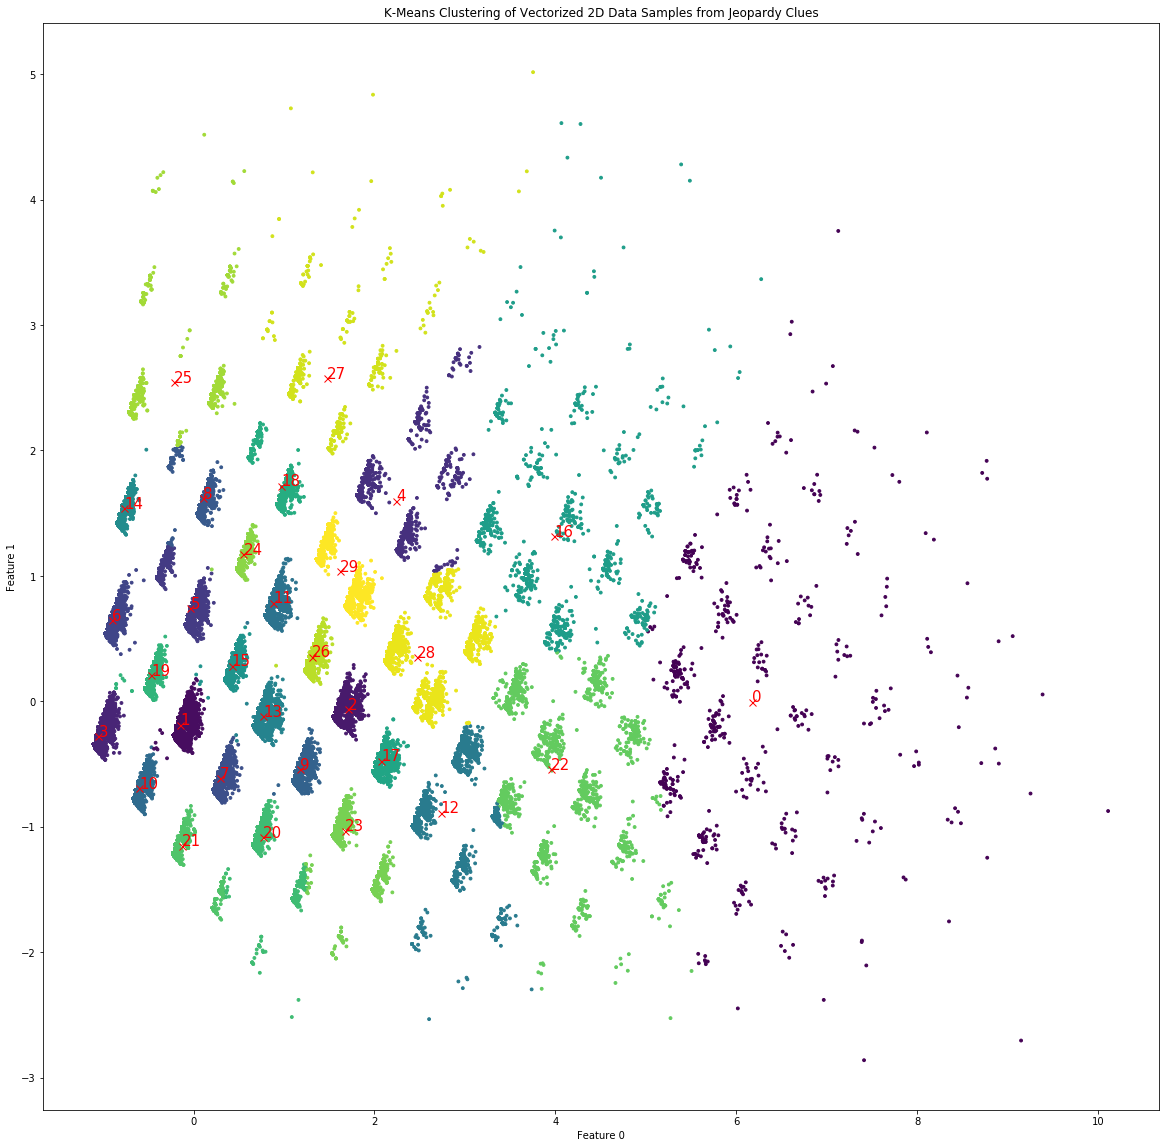

In [36]:
plt.figure(figsize=(20,20))
plt.title("K-Means Clustering of Vectorized 2D Data Samples from Jeopardy Clues")
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Add a scatterplot with all of the data samples from count_vectorized_df.
plt.scatter(count_vectorized_2D_df[0], count_vectorized_2D_df[1], s=8, c=count_vectorized_2D_df['Nearest Centroid'])
# s is marker size
# c is the variable the colours should be catagorized by
    
# For each cluster in cluster_centers_df, grab the centroid coordinate and plot it with a red 'X'
for i in range(cluster_centers_df.shape[0]):
    centroid = kmeans_model.cluster_centers_[i]
    plt.plot(centroid[0], centroid[1], marker='x', markersize=7, color='red', 
             label=count_vectorized_2D_df['Nearest Centroid'])
    plt.annotate(str(i),centroid,size=15, color = 'red')


Visually, it doesn't look the model clustered the data too well - especially the outliers. K-means assumes the clusters are convex, and the data samples aren't necessarily arranged that way.

How effective was my model in clustering the dataset? Let's now look at some Validation Metrics  - namely the Silhouette Score, Calinski-Harabasz Score, and Davies-Bouldin Index:

NOTE: AVOID RUNNING THIS NEXT CELL, IT TAKES A LONG TIME TO RUN - I HAVE ALREADY WRITTEN THE RESULT DOWN BELOW THE CELL

In [75]:
# WARNING: THIS CELL TAKES A LONG TIME TO RUN
# from sklearn.metrics import silhouette_score

# kmeans = KMeans(n_clusters=30, random_state=0).fit(count_vectorized_2D)
# silhouette_score(count_vectorized_2D, kmeans.labels_)

# Value: 0.7799379044792613

0.7799379044792613

A silhouette score of 0.779 is actually a pretty good score. A score of +1 indicates a highly dense clustering, so to be over 3/4ths of that metrics is a positive sign that my model peformed better than I thought.

In [37]:
from sklearn.metrics import calinski_harabasz_score

kmeans = KMeans(n_clusters=30, random_state=0).fit(count_vectorized_2D)
calinski_harabasz_score(count_vectorized_2D, kmeans.labels_ )

747317.6559588399

The Calinski-Harabasz score is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters. A higher Calinski-Harabasz index relates to a model with better defined clusters - I will be able to gain more insight on whether this value of 747317.65 is good or bad once I get more Calinski-Harabasz scores from the other clustering models.

In [38]:
from sklearn.metrics import davies_bouldin_score

kmeans = KMeans(n_clusters=30, random_state=0).fit(count_vectorized_2D)
davies_bouldin_score(count_vectorized_2D, kmeans.labels_ )

0.5206549682561905

The Davies-Bouldin index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares
the distance between clusters with the size of the clusters.

0 is the lowest possible score, and values closer to zero indicate a better partition.

Based off that, our value of 0.52 is fairly close to 0 - according to this, the clusters are not really similar and are better partitioned.

Let's randomly pick a cluster and manually check the questions in that cluster to see if there is any similarity between them:

In [39]:
# Manual Check - Randomly pick a centroid and grab the indices of all the data samples who are closest to that centroid
# Randomly pick centroid #15, for example
indices_of_samples_with_same_nearest_centroid = count_vectorized_2D_df[count_vectorized_2D_df['Nearest Centroid'] == 15].index
indices_of_samples_with_same_nearest_centroid

# For each index in the indices grabbed above, print out it's corresponding originalquestion in clues_df to see if there is 
# similarity between the questions
cluster_questions = []
cluster_categories = []
clues_printed = 0

print('Sample of 20 Clues that are closest to Cluster #15:\n')
for i in indices_of_samples_with_same_nearest_centroid:
    try:
        cluster_questions.append(clues_df['Question'][i])
        cluster_categories.append(clues_df['Category'][i])
        # If less than 20 clues have been printed, print the clue and category for manual checking
        if clues_printed < 20:
            print("Clue: ", clues_df['Question'][i], "\t", "Category: ", clues_df['Category'][i], "\n")
            clues_printed += 1;
    except KeyError:
        pass

Sample of 20 Clues that are closest to Cluster #15:

Clue:  "Though its name means ""city of peace"", it's seen over 30 wars, the last in 1967" 	 Category:  THE BIBLE 

Clue:  The third Monday of January starting in 1986 	 Category:  HOLIDAYS 

Clue:  The basic unit of life; 3 billion die every minute in your body 	 Category:  BIOLOGY 

Clue:  "As result of anti-slavery raid on Harper's Ferry, his ""body lies a moldering in the grave\""" 	 Category:  BLACK AMERICA 

Clue:  "First member of the ""me"" generation, this youth fell in love with his own reflection" 	 Category:  GREEK MYTHOLOGY 

Clue:  Number of downs allowed in Canadian football to advance the ball 10 yards 	 Category:  SPORTS 

Clue:  "Because of WWII, these 2 NFL teams combined squads in '43 to become the ""Stegles\""" 	 Category:  SPORTS 

Clue:  The number of zeros in 1 trillion 	 Category:  MATHEMATICS 

Clue:  Only one of the 5 Great Lakes entirely in U.S. 	 Category:  BODIES OF WATER 

Clue:  3-word greeting in the 

Upon first glance, the questions from this cluster don't look similar - the topics and official categories are quite varied. Any similarities found seem to be small ones. From this small sample the questions content might be geared more towards Sports, TV, and Movies.

Let's look at the categories of all the questions in the cluster - I'm interested to see if most of the clues in this cluster have a common theme.

In [40]:
# Create a dictionary containing the questions in the cluster and their categories 
cluster_dict = {"Question": [], "Category": []}
cluster_dict["Question"] = cluster_questions
cluster_dict["Category"] = cluster_categories

# Convert dictionary to a DataFrame
cluster_df = pd.DataFrame(cluster_dict)
# Get the number of questions for each category in the cluster
category_counts = cluster_df["Category"].value_counts()
# Convert the counts to a DataFrame
category_counts = category_counts.to_frame()
# Relabel columns before printing
category_counts = category_counts.rename_axis('Label').reset_index()
category_counts.rename(columns = {'Category':'Count'}, inplace = True)
# Print number of total clues and categories in this cluster
print(f"Number of Clues in Cluster: {cluster_df.shape[0]}")
print(f"Number of Categories in Cluster: {category_counts.shape[0]}")
# Display top 20 categories in the cluster by count 
category_counts.head(20)

Number of Clues in Cluster: 17694
Number of Categories in Cluster: 10993


Label  Count
0   AMERICAN HISTORY     81
1            HISTORY     66
2         LITERATURE     63
3      WORLD HISTORY     55
4          POTPOURRI     49
5         NONFICTION     44
6            MUSEUMS     43
7   EUROPEAN HISTORY     41
8           RELIGION     39
9             SPORTS     39
10           SCIENCE     39
11    TRANSPORTATION     37
12             OPERA     36
13               ART     35
14            BALLET     34
15       SHAKESPEARE     34
16         LANGUAGES     34
17           ISLANDS     33
18        HODGEPODGE     32
19           AUTHORS     31

Out of the top categories in this cluster, history seems to be the most common - with History, World History, European History, American History, and Museums all appearing in the top 20. Literature is also present in this cluster with Literature, Shakesphere, and Nonfiction appearing in the top 20.

It is encouraging to see that the questions in this cluster appear to be slightly slanted towards a couple of categories - even if it is not a siginificant amount of clues. Keep in mind however that there are 10993 categories, so the low numbers in the table above indicate that the categories are quite varied and there isn't a category or topic that the cluster questions are heavily geared to.

To demonstrate this point, let's visualize the top 40 categories in the cluster in a pie/donut chart below - you'll see that it's quite varied. You can hover your mouse over each section in the pie/donut to get more details.

In [41]:
fig = px.pie(category_counts[0:40], values='Count', names='Label', title='Clues in Cluster #15 - Grouped by Category', hole=0.6)
fig.update_traces(textposition='outside', textinfo='percent')
fig.show()

Let's see if using a GaussianMixture Model is any better.

### Step 4.2: Gaussian Mixture Model


First, let's see how many components we'll need for our Gauusian Mixture model. Let's create an array of Gaussian Mixture models, each with a different number of components from 5 to 60:

NOTE: This cell may take a while to run. Please be patient!

In [42]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(5, 60, 5)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(count_vectorized_2D) for n in n_components]

Next, let's use some techniques in the Data Science Handbook to plot the Akaike information criterion (AIC) and the Bayesian information criterion (BIC) for each Gaussian Mixture model in our array.

From Data Science Handbook Chapter 5: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

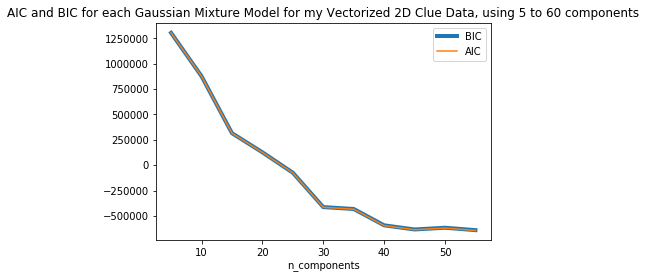

In [43]:
# First determine the right number of components to use for the model by plotting the Akaike information criterion (AIC) 
# and the Bayesian information criterion (BIC) for each GaussianMixture model with components from 5 to 60
plt.plot(n_components, [m.bic(count_vectorized_2D) for m in models], label='BIC', linewidth='4')
plt.plot(n_components, [m.aic(count_vectorized_2D) for m in models], label='AIC')
plt.legend(loc='best')
plt.title('AIC and BIC for each Gaussian Mixture Model for my Vectorized 2D Clue Data, using 5 to 60 components');
plt.xlabel('n_components');

Here, the Akaike information criterion (AIC) and the Bayesian information criterion (BIC) plots for all the GaussianMixture models with components from 5 to 60 are the same. 

I will choose the number of components to be 45, since the optimal number of clusters is the value that minimizes the AIC or BIC line plots and the line plot seems to level out from this point on.

In [44]:
# Fit GaussianMixture model to data
gm_model = GaussianMixture(n_components=45, covariance_type='full', random_state=0)
gm_model.fit(count_vectorized_2D)
cluster_labels = gm_model.predict(count_vectorized_2D)

In [45]:
# Check class probabilities for the input data points.
probs = gm_model.predict_proba(count_vectorized_2D)
print(probs.round(3))

[[0.998 0.    0.    ... 0.    0.    0.   ]
 [0.    0.018 0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.961 ... 0.    0.032 0.   ]]


Let's add a cluster label column next to each data sample coordinate and call it labels_df:

In [46]:
labels_df = pd.DataFrame(count_vectorized_2D)
labels_df["Cluster Label"] = cluster_labels
labels_df

0         1  Cluster Label
0      -0.088763  0.614795              0
1      -1.096809 -0.353105             25
2      -0.898863  0.678126              7
3      -0.219336 -0.267511             35
4      -1.103361 -0.340951             25
...          ...       ...            ...
389411 -0.892311  0.665972              7
389412 -0.014839  0.751566              0
389413 -0.114776 -0.107211              5
389414  2.225026 -0.521971             29
389415  1.833389  0.690073              2

[389416 rows x 3 columns]

The block of code is taken from Chapter 5 of the Data Science Handbook and will help me draw the Gaussian Mixture model.

In [47]:
# Functions to help draw ellipses and plot GaussianMixture model
# Code from Chapter 5 of the Data Science Handbook: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

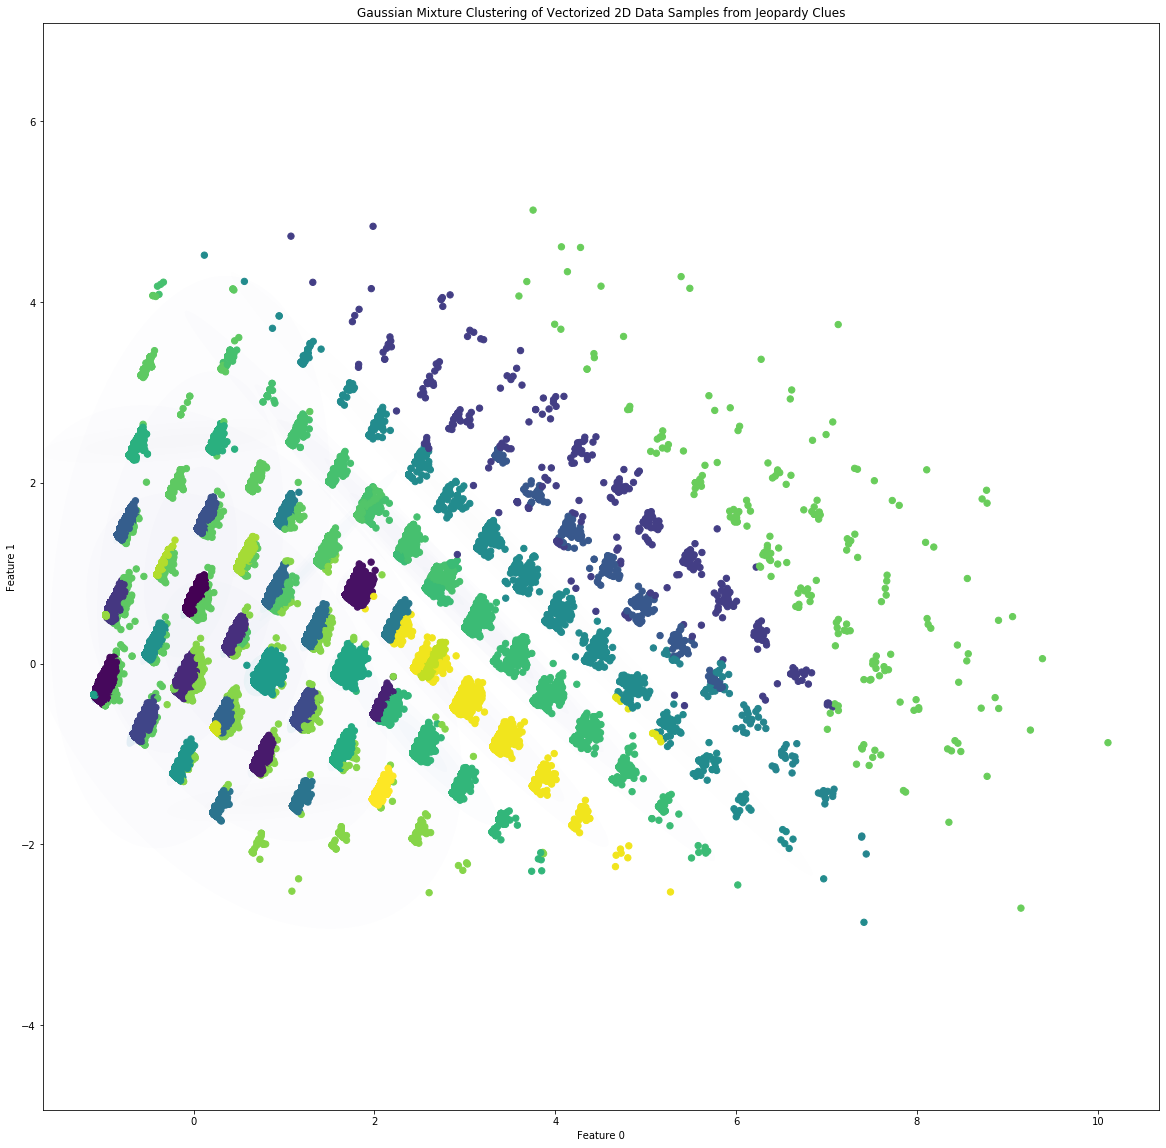

In [48]:
# Plot Gaussian Mixture Model
plt.figure(figsize=(20,20))
plt.title("Gaussian Mixture Clustering of Vectorized 2D Data Samples from Jeopardy Clues")
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plot_gmm(gm_model, count_vectorized_2D)

Again, it doesn't look the model clustered the data too well - some clusters are overlapping with others.

How effective was my model in clustering the dataset compared to K-means? Let's now look at some Validation Metrics - namely the Silhouette Score, Calinski-Harabasz Score, and Davies-Bouldin Index:

NOTE: AVOID RUNNING THIS NEXT CELL, IT TAKES A LONG TIME TO RUN - I HAVE ALREADY WRITTEN THE RESULT DOWN BELOW THE CELL

In [81]:
# WARNING: THIS CELL TAKES A LONG TIME TO RUN
# from sklearn.metrics import silhouette_score

# gm_model = GaussianMixture(n_components=45, covariance_type='full', random_state=0)
# gm_model.fit(count_vectorized_2D)
# silhouette_score(count_vectorized_2D, cluster_labels)

# Value: 0.6357018745148983

0.6357018745148983

A silhouette score of 0.636 is not as good as the K-Means score of 0.779, but is still a high-quality cluster since it is over 0.5.

In [49]:
from sklearn.metrics import calinski_harabasz_score

gm_model = GaussianMixture(n_components=45, covariance_type='full', random_state=0)
gm_model.fit(count_vectorized_2D)
cluster_labels = gm_model.predict(count_vectorized_2D)
calinski_harabasz_score(count_vectorized_2D, cluster_labels)

301526.4068932766

The Calinski-Harabasz score is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters. A higher Calinski-Harabasz index relates to a model with better defined clusters - compared to the value of 747317.65 for the K-Means model, this value of 301526.41 is much smaller. This makes sense, as the K-Means clusters do seem more well defined and spaced apart compared to the GMM clusters.

In [50]:
from sklearn.metrics import davies_bouldin_score

gm_model = GaussianMixture(n_components=45, covariance_type='full', random_state=0)
gm_model.fit(count_vectorized_2D)
cluster_labels = gm_model.predict(count_vectorized_2D)
davies_bouldin_score(count_vectorized_2D, cluster_labels)

1.4831602761554226

The Davies-Bouldin index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters.

0 is the lowest possible score, and values closer to zero indicate a better partition.

Based off that, our value of 1.48 is not as close to 0 as the previous K-Means value of 0.52 - therefore, our clusters from Gaussian Mixture are more similar and are not partitioned as well as K-Means clusters.

Let's manually check the clues in a random cluster and see if this is true:

In [51]:
# Manual Check - Randomly pick a centroid and grab the indices of all the data samples who are closest to that centroid
# Randomly pick centroid #4, for example
indices_of_samples_with_same_cluster_label = labels_df[labels_df['Cluster Label'] == 4].index
indices_of_samples_with_same_cluster_label

# For each index in the indices grabbed above, print out it's corresponding question in clues_df to see if there is 
# similarity between the questions
cluster_questions = []
cluster_categories = []
clues_printed = 0

print('Sample of 20 Clues that are closest to Cluster #4:\n')
for i in indices_of_samples_with_same_cluster_label:
    try:
        cluster_questions.append(clues_df['Question'][i])
        cluster_categories.append(clues_df['Category'][i])
        # If less than 20 clues have been printed, print the clue and category for manual checking
        if clues_printed < 20:
            print("Clue: ", clues_df['Question'][i], "\t", "Category: ", clues_df['Category'][i], "\n")
            clues_printed += 1;
    except KeyError:
        pass

Sample of 20 Clues that are closest to Cluster #4:

Clue:  The date on the tablet held by the Statue of Liberty 	 Category:  LANDMARKS 

Clue:  The words that announce the start of the Indianpolis 500 	 Category:  SPORTS 

Clue:  "Popular TV Western featuring this theme: ""I'll tell you a story, a real true life story / A tale of the Western frontier / The West, it was lawless / But one man was flawless / And his is the story you'll hear...\""" 	 Category:  THE '50s 

Clue:  Sum of the 3 Billy Goats Gruff, the 3 Little Pigs & Goldilocks & the 3 Bears 	 Category:  EASY MATH 

Clue:  It was known as the dingus, the stuff dreams are made of & the black bird 	 Category:  MOVIE TRIVIA 

Clue:  Indication that a song has the right ammunition to make it to the top of the charts 	 Category:  WEAPONS 

Clue:  The skin covering the top of the head 	 Category:  THE HUMAN BODY 

Clue:  To become the “Sleeping Beauty”, the princess pricked her hand on this part of the spinning wheel 	 Category:  FA

Upon first glance, the questions from this cluster don't look similar - the topics and official categories are quite varied. Unlike the K-Means cluster I manually checked, the questions don't seem to have an obvious common theme. 

Let's look at the categories of all the questions in the cluster - I'm interested to see if most of the clues in this cluster have a common theme.

In [52]:
# Create a dictionary containing the questions in the cluster and their categories 
cluster_dict = {"Question": [], "Category": []}
cluster_dict["Question"] = cluster_questions
cluster_dict["Category"] = cluster_categories

# Convert dictionary to a DataFrame
cluster_df = pd.DataFrame(cluster_dict)
# Get the number of questions for each category in the cluster
category_counts = cluster_df["Category"].value_counts()
# Convert the counts to a DataFrame
category_counts = category_counts.to_frame()
# Relabel columns before printing
category_counts = category_counts.rename_axis('Label').reset_index()
category_counts.rename(columns = {'Category':'Count'}, inplace = True)
# Print number of total clues and categories in this cluster
print(f"Number of Clues in Cluster: {cluster_df.shape[0]}")
print(f"Number of Categories in Cluster: {category_counts.shape[0]}")
category_counts.head(20)

Number of Clues in Cluster: 2973
Number of Categories in Cluster: 2441


Label  Count
0   BODIES OF WATER     16
1           ANATOMY     14
2    THE BODY HUMAN     12
3      WORLD CITIES      9
4         EXPLORERS      9
5    THE HUMAN BODY      9
6     ANCIENT TIMES      8
7   WORLD GEOGRAPHY      8
8           ANIMALS      8
9      WORD ORIGINS      8
10        MYTHOLOGY      8
11        GEOGRAPHY      7
12      U.S. STATES      7
13       LITERATURE      7
14          AUTHORS      7
15         RELIGION      7
16            BIRDS      6
17  CLASSICAL MUSIC      5
18          ZOOLOGY      5
19        DEM BONES      5

Out of the top categories in this cluster, anatomy-based categories like Anatomy, The Human Body, and The Body Human are all among the top 20 categories. 'Body' or 'Bodies' seems to be the main theme for the cluster, as the category 'Bodies of Water' is the leading category. There is also a small amount of name-based categories (Explorers, Authors, U.S. Presidents) or animal-based categories (Animal, Birds) in this cluster. However, the clue count for each category are quite low overall which indicates a very diverse set of topics for this cluster.

Let's visualize the top 40 categories in the cluster in a pie/donut chart below - you'll still see that it's quite varied, but there seems to be more of a common theme present in this cluster compared to the K-Means cluster I looked at earlier. You can hover your mouse over each section in the pie/donut to get more details.

In [53]:
fig = px.pie(category_counts[0:40], values='Count', names='Label', title='Clues in Cluster #4 - Grouped by Category', hole=0.6)
fig.update_traces(textposition='outside', textinfo='percent')
fig.show()

Let's look at DBSCAN now.

### Step 4.3: DBSCAN

For DBSCAN, let's arbitraily choose an eps value of 0.1 and a min_samples value of 10 for this model. Because of memory and time constraints, let's choose 50000 random samples from our dataset for the model.

NOTE: Because I am using random samples from the dataset, the results might be different when you run the code.

In [54]:
from sklearn.cluster import DBSCAN

# Create DataFrame from count_vectorized_2D
count_vectorized_2D_df = pd.DataFrame(count_vectorized_2D)

# Create an NumPy representation of the DataFrame
count_vectorized_2D_array = count_vectorized_2D_df.values

# Array of 50000 random numbers that will represent the indices of the rows we'll grab for our random sample
random_row_num = np.random.randint(count_vectorized_2D_array.shape[0], size=50000)
# Create random sample from dataset
sample = count_vectorized_2D_array[random_row_num, :]
# Convert random sample to DataFrame
sample_df = pd.DataFrame(sample)
# Convert first and second columns of sample DataFrame to NumPy representation
sample_array = sample_df[[0,1]].values 

# Fit DBSCAN model to sample_array
db = DBSCAN(eps=0.1, min_samples=10).fit(sample_array)

# Add labels from the model as a column to the sample DataFrame
sample_df['Cluster Labels'] = db.labels_
sample_df.head(10)

0         1  Cluster Labels
0  0.115734  1.633872               0
1  0.465124  0.275056               1
2 -1.079277 -0.305269               2
3 -1.103361 -0.340951               2
4 -0.460924  0.242892               3
5 -1.079277 -0.305269               2
6 -0.898863  0.678126               4
7  0.035273  0.855365               5
8  0.730466 -1.001207               6
9  1.380824  0.338495               7

Let's now visualize this dataset:

Text(0, 0.5, 'Feature 1')

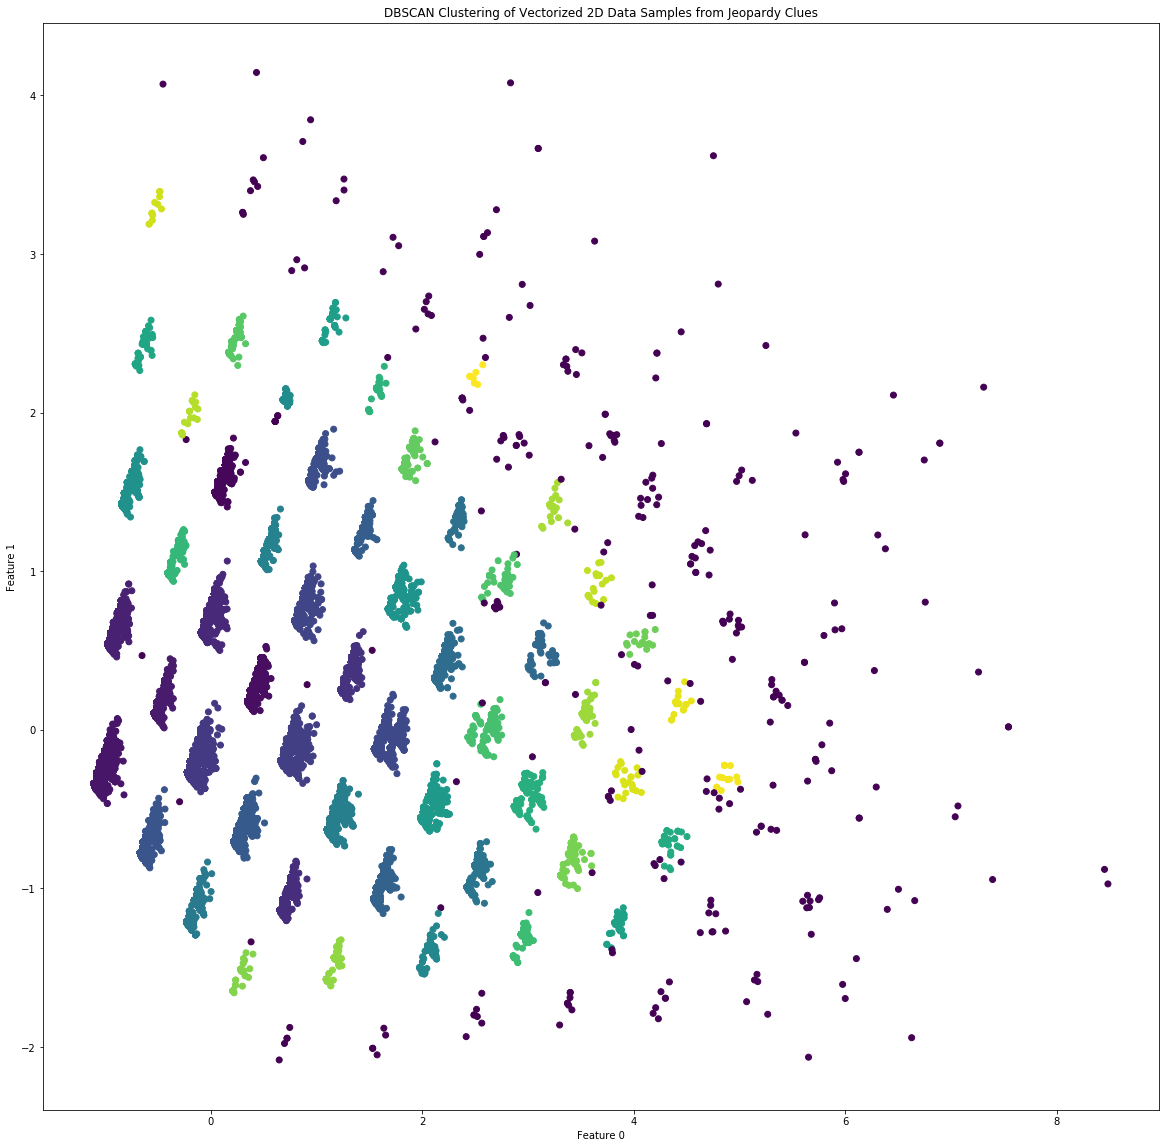

In [55]:
fig = plt.figure(figsize=(20,20))
plt.scatter(sample_df[0], sample_df[1], c = db.labels_)
plt.title("DBSCAN Clustering of Vectorized 2D Data Samples from Jeopardy Clues")
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

It looks like the clusters are spaced apart nicely with minimal overlap, apart from the outliers. This probably had to do with the idea behind DBSCAN - that clusters form dense regions of data, separated by regions that are relatively empty.

How effective was my model in clustering the dataset compared to K-means and GMM? Let's now look at some Validation Metrics - namely the Silhouette Score, Calinski-Harabasz Score, and Davies-Bouldin Index:

In [56]:
from sklearn.metrics import silhouette_score

db = DBSCAN(eps=0.1, min_samples=10).fit(sample_array)
silhouette_score(sample_array, db.labels_)

0.801524067109577

A silhouette score of 0.802 is a good score - slightly better than the K-Means score of 0.779 and significantly better than the GMM score of 0.636. It is important to keep in mind that this score was computed with only 5000 samples, as opposed to K-Means and GMM using the entire dataset. A score of +1 indicates a highly dense clustering, so to be about 4/5ths of that metric is a positive sign that my model peformed better than I thought.

In [57]:
from sklearn.metrics import calinski_harabasz_score

db = DBSCAN(eps=0.1, min_samples=10).fit(sample_array)
cluster_labels = db.fit_predict(sample_array) 
calinski_harabasz_score(sample_array, cluster_labels)

30609.664581931916

The Calinski-Harabasz score is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters. A higher Calinski-Harabasz index relates to a model with better defined clusters - compared to the value of 747317.65 for the K-Means model and a value of 301526.41 for GMM, the DBSCAN value of 30609.66 is significantly smaller. This is slightly surprising, as the clusters from the visualization above seem to be more well-defined and space-apart with less overlap compared to the visualization in GMM.

In [58]:
from  sklearn.metrics import davies_bouldin_score

db = DBSCAN(eps=0.1, min_samples=10).fit(sample_array)
cluster_labels = db.fit_predict(sample_array) 
davies_bouldin_score(sample_array, cluster_labels)

1.4302324646424611

The Davies-Bouldin index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters.

0 is the lowest possible score, and values closer to zero indicate a better partition.

Based off that, our value of 1.43 is about the same as the GMM value of 1.48. Both are not as close to 0 as the previous K-Means value of 0.52 - therefore, our clusters from DBSCAN are more similar and are not partitioned as well as K-Means clusters.

Let's manually check the clues in a random cluster and see if this is true:

In [59]:
indices_of_samples_with_same_label = sample_df[sample_df['Cluster Labels'] == 10].index

cluster_questions = []
cluster_categories = []
clues_printed = 0

print('Sample of 20 Clues that are closest to Cluster #10:\n')
for i in indices_of_samples_with_same_label:
    try:
        cluster_questions.append(clues_df['Question'][i])
        cluster_categories.append(clues_df['Category'][i])
        # If less than 20 clues have been printed, print the clue and category for manual checking
        if clues_printed < 20:
            print("Clue: ", clues_df['Question'][i], "\t", "Category: ", clues_df['Category'][i], "\n")
            clues_printed += 1;
    except KeyError:
        pass

Sample of 20 Clues that are closest to Cluster #10:

Clue:  "The ""coq"" in coq au vin" 	 Category:  FOREIGN CUISINE 

Clue:  His famed San Quentin concert inspired inmate Merle Haggard 	 Category:  COUNTRY MUSIC 

Clue:  First volcano to erupt in continental U.S. since 1921 	 Category:  MOUNTAINS 

Clue:  "Charlton Heston was ""on track"" with it in ""Ben Hur\""" 	 Category:  TRANSPORTATION 

Clue:  It spent the night in a discount-house parking lot before heading to L.A. Coliseum 	 Category:  TRIVIA 

Clue:  Used in cars' catalytic converters, it's more expensive than gold 	 Category:  CHEMISTRY 

Clue:  It's divided into the Kanda, Marunoucki, Asakusa & Ginza districts 	 Category:  WORLD CAPITALS 

Clue:  "Though historians debate it, she's called ""The Virgin Queen\""" 	 Category:  BRITISH HISTORY 

Clue:  Its name comes from legend that first one was stirred with a rooster feather 	 Category:  POTENT POTABLES 

Clue:  "Bullwinkle's ""arch"" enemy with a name derived from Russian c

The questions from this cluster don't look too similar - the topics and official categories are quite varied with bits of Music, Movies, Politics. The only other thing I could possibly say are similar are the length of the questions - they seem shorter, direct, and to-the-point.

Let's look at the categories of all the questions in the cluster - Again, I'm interested to see if most of the clues in this cluster have a common theme.

In [60]:
# Create a dictionary containing the questions in the cluster and their categories 
cluster_dict = {"Question": [], "Category": []}
cluster_dict["Question"] = cluster_questions
cluster_dict["Category"] = cluster_categories

# Convert dictionary to a DataFrame
cluster_df = pd.DataFrame(cluster_dict)
# Get the number of questions for each category in the cluster
category_counts = cluster_df["Category"].value_counts()
# Convert the counts to a DataFrame
category_counts = category_counts.to_frame()
# Relabel columns before printing
category_counts = category_counts.rename_axis('Label').reset_index()
category_counts.rename(columns = {'Category':'Count'}, inplace = True)
# Print number of total clues and categories in this cluster
print(f"Number of Clues in Cluster: {cluster_df.shape[0]}")
print(f"Number of Categories in Cluster: {category_counts.shape[0]}")
category_counts.head(20)

Number of Clues in Cluster: 1155
Number of Categories in Cluster: 758


Label  Count
0                SCIENCE      9
1              THE BIBLE      9
2                HISTORY      8
3             LITERATURE      8
4            U.S. CITIES      7
5         TRANSPORTATION      7
6           WORD ORIGINS      7
7                ANIMALS      7
8            U.S. STATES      6
9                   FOOD      6
10   BUSINESS & INDUSTRY      6
11                SPORTS      5
12  FICTIONAL CHARACTERS      5
13          WORLD CITIES      5
14          U.S. HISTORY      5
15         WORLD HISTORY      5
16             ASTRONOMY      5
17     SICKNESS & HEALTH      5
18                 GAMES      5
19        THE HUMAN BODY      5

Science is the top category in this cluster, but with only 9 clues out of 1155. The categories are pretty varied here, and do not lean to a specific category.

Let's visualize the top 40 categories in the cluster in a pie/donut chart below - as expected, it's quite varied, and doesn't seem to lean to a specific category. You can hover your mouse over each section in the pie/donut to get more details.

In [61]:
fig = px.pie(category_counts[0:40], values='Count', names='Label', title='Clues in Cluster #10 - Grouped by Category', hole=0.6)
fig.update_traces(textposition='outside', textinfo='percent')
fig.show()

Overall, the results for the DBSCAN model are worse than those of K-Means and Gaussian Mixture Model.

Given extra time and resources, I would perform a grid search to determine to best parameters to use, and use parallel computing or a more powerful computer in order to fit a DBSCAN model to the entire dataset.

Let's move on to Agglomerative Clustering.

### Step 4.4: Agglomerative Clustering

For Agglomerative Clustering, let's use 10000 samples for time and memory purposes. 
First, we'll have to use a Dendrogram to help decide how many clusters to use.

NOTE: Because I am using random samples from the dataset, the results might be different when you run the code.

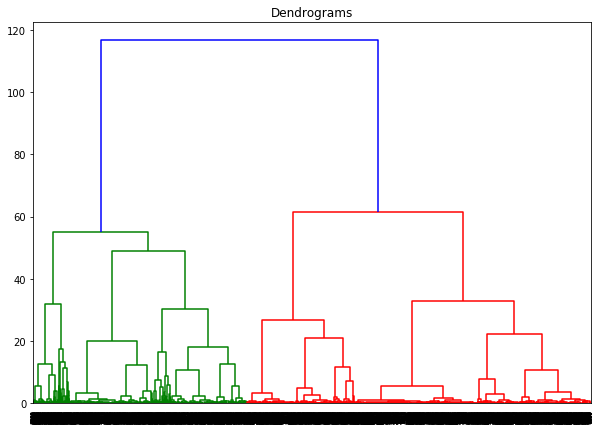

In [62]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Create DataFrame from count_vectorized_2D
count_vectorized_2D_df = pd.DataFrame(count_vectorized_2D)

# Create an NumPy representation of the DataFrame
count_vectorized_2D_array = count_vectorized_2D_df.values

# Array of 10000 random numbers that will represent the indices of the rows we'll grab for our random sample
random_row_num = np.random.randint(count_vectorized_2D_array.shape[0], size=10000)
# Create random sample from dataset
sample = count_vectorized_2D_array[random_row_num, :]
# Convert random sample to DataFrame
sample_df = pd.DataFrame(sample)

# Create Linkage Array using the default ward linkage type and euclidean distance metric
linkage_array = linkage(sample_df, metric='euclidean', method='ward')

# Plot the dendrogram for the linkage_array containing the distances between clusters

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(linkage_array)

To determine the number of clusters to use, we imagine a horizontal line (the dashed line below) cutting across the section with the largest vertical lines in the dendrogram above - that is the section with the blue lines. The number of vertical lines that this dashed line intersects is the number of clusters.

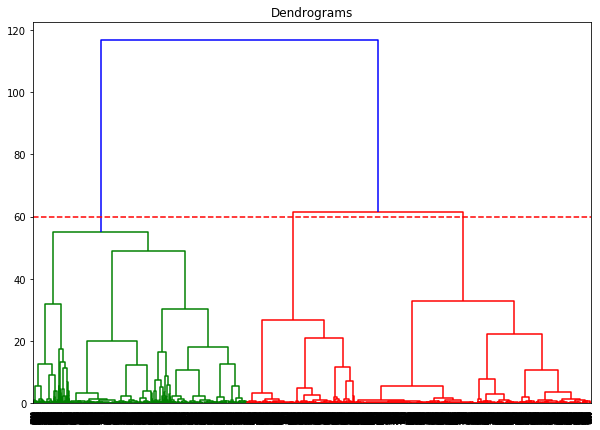

In [64]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(linkage_array)
plt.axhline(y=60, color='r', linestyle='--')

The horizontal dashed line intersects 3 vertical lines, so we'll use 3 clusters.

In [65]:
agg = AgglomerativeClustering(n_clusters=3)
# Fit Agglomerative model to sample_df
agg.fit_predict(sample_df)

# Add labels from the model as a column to the sample DataFrame
sample_df['Cluster Labels'] = agg.labels_
sample_df.head(10)

0         1  Cluster Labels
0 -0.014839  0.751566               2
1  1.187799 -0.504524               0
2  0.318555 -0.497857               0
3  0.073486  1.487099               2
4 -0.219336 -0.267511               1
5 -0.184005 -0.243820               1
6  0.730466 -1.001207               0
7 -0.145412 -0.130739               1
8 -0.138860 -0.142893               1
9  3.123340  0.608018               0

Text(0, 0.5, 'Feature 1')

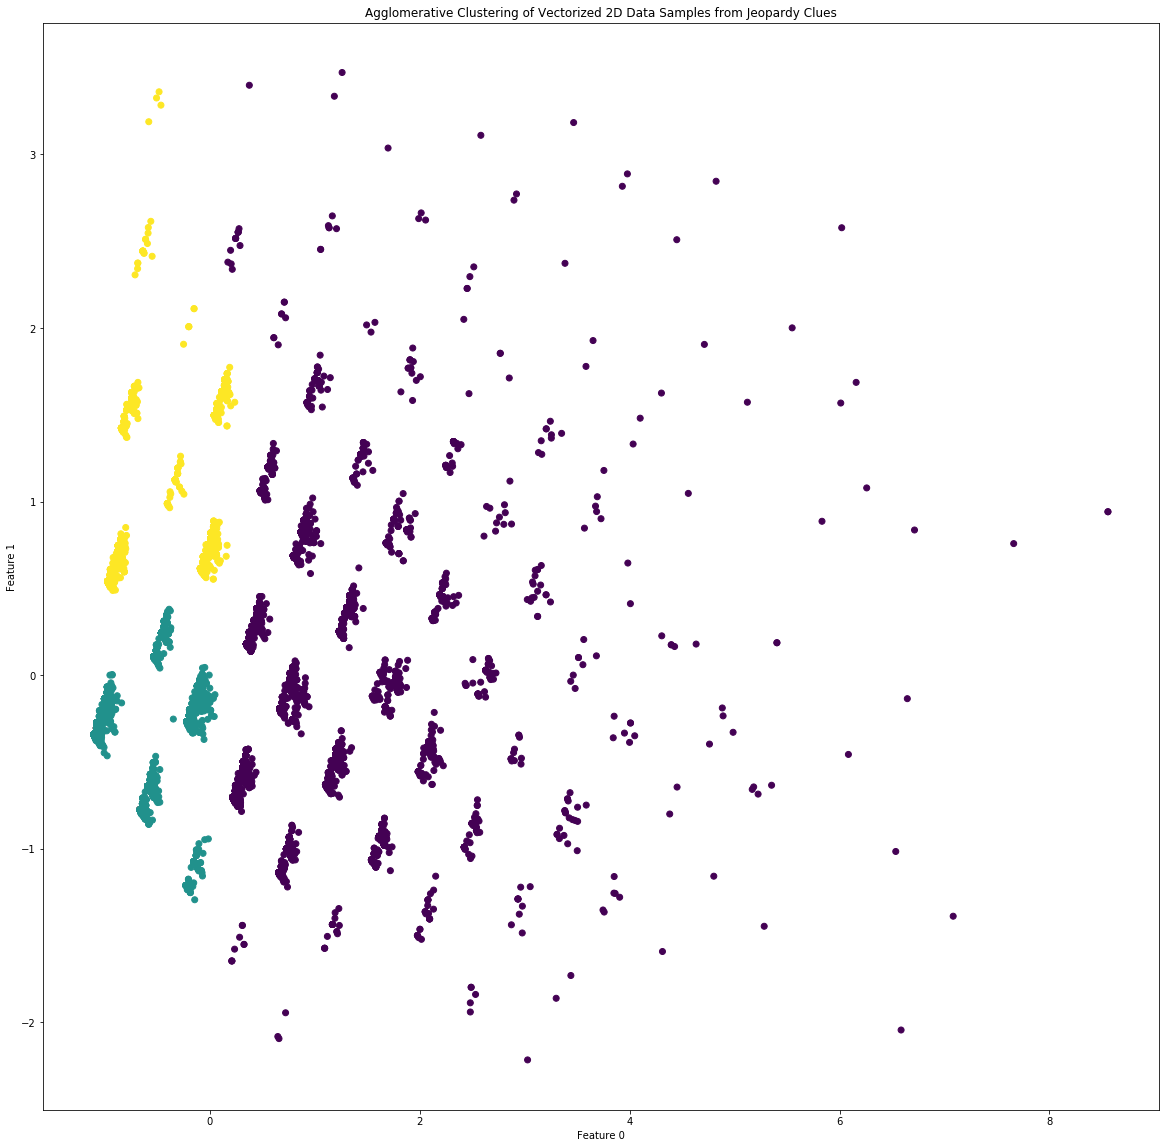

In [66]:
fig = plt.figure(figsize=(20,20))
plt.scatter(sample_df[0], sample_df[1], c = agg.labels_)
plt.title("Agglomerative Clustering of Vectorized 2D Data Samples from Jeopardy Clues")
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

With only three clusters it will be interesting to see contents of each one.

How effective was my model in clustering the dataset compared to K-means, GMM, and DBSCAN? Let's look at some Validation Metrics - namely the Silhouette Score, Calinski-Harabasz Score, and Davies-Bouldin Index:

In [67]:
from sklearn.metrics import silhouette_score

agg = AgglomerativeClustering(n_clusters=3)
# Fit Agglomerative model to sample_df
agg.fit_predict(sample_df)
silhouette_score(sample_df, agg.labels_)

C:\Users\milec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



0.5458208058202032

A silhouette score of 0.546 is significantly less than the K-Means score of 0.779 and the DBSCAN score of 0.802, while being closer to the GMM score of 0.636. It is important to keep in mind that this score was computed with only 10000 samples, as opposed to K-Means and GMM using the entire dataset. A score of +1 indicates a highly dense clustering, so to be only just half of that score indicates to me that the model produced slightly above-average results.


In [68]:
from sklearn.metrics import calinski_harabasz_score

agg = AgglomerativeClustering(n_clusters=3)
# Fit Agglomerative model to sample_df
agg.fit_predict(sample_df)
calinski_harabasz_score(sample_df, agg.labels_)

C:\Users\milec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



10498.912679528881

The Calinski-Harabasz score is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters. A higher Calinski-Harabasz index relates to a model with better defined clusters - compared to the value of 747317.65 for the K-Means model, the value of 301526.41 for GMM, and the DBSCAN value of 30705.80, the score of 10498.91 is significantly less than all of these scores. This is not surprising, as building only three overlapping clusters means these clusters likely won't be particularly well-defined.

In [69]:
from  sklearn.metrics import davies_bouldin_score

agg = AgglomerativeClustering(n_clusters=3)
# Fit Agglomerative model to sample_df
agg.fit_predict(sample_df)
davies_bouldin_score(sample_df, agg.labels_)

C:\Users\milec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



0.674515914259875

The Davies-Bouldin index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters.

0 is the lowest possible score, and values closer to zero indicate a better partition.

Based off that, our value of 0.67 falls between the DBSCAN value of 1.40, GMM value of 1.48 and the K-Means value of 0.52 - therefore, our clusters from Agglomerative clustering are more similar compared to K-means clusters, but are still better partitioned compared to DBSCAN and GMM.

Manually checking questions in each cluster seems pointless when there are only three clusters, so let's go straight to visualizing the top 40 categories for two of the clusters in a pie/donut charts below. You can hover your mouse over each section in the pie/donut to get more details.

In [70]:
indices_of_samples_with_same_label = sample_df[sample_df['Cluster Labels'] == 0].index

cluster_questions = []
cluster_categories = []
print('Cluster #0:\n')

for i in indices_of_samples_with_same_label:
    try:
        cluster_questions.append(clues_df['Question'][i])
        cluster_categories.append(clues_df['Category'][i])
    except KeyError:
        pass

# Create a dictionary containing the questions in the cluster and their categories 
cluster_dict = {"Question": [], "Category": []}
cluster_dict["Question"] = cluster_questions
cluster_dict["Category"] = cluster_categories

# Convert dictionary to a DataFrame
cluster_df = pd.DataFrame(cluster_dict)
# Get the number of questions for each category in the cluster
category_counts = cluster_df["Category"].value_counts()
# Convert the counts to a DataFrame
category_counts = category_counts.to_frame()
# Relabel columns before printing
category_counts = category_counts.rename_axis('Label').reset_index()
category_counts.rename(columns = {'Category':'Count'}, inplace = True)
# Print number of total clues and categories in this cluster
print(f"Number of Clues in Cluster: {cluster_df.shape[0]}")
print(f"Number of Categories in Cluster: {category_counts.shape[0]}")

fig = px.pie(category_counts[0:40], values='Count', names='Label', title='Clues in Cluster #0 - Grouped by Category', hole=0.6)
fig.update_traces(textposition='outside', textinfo='percent')
fig.show()

Cluster #0:

Number of Clues in Cluster: 3830
Number of Categories in Cluster: 1083


In [71]:
indices_of_samples_with_same_label = sample_df[sample_df['Cluster Labels'] == 1].index

cluster_questions = []
cluster_categories = []
print('Cluster #1:\n')

for i in indices_of_samples_with_same_label:
    try:
        cluster_questions.append(clues_df['Question'][i])
        cluster_categories.append(clues_df['Category'][i])
    except KeyError:
        pass

# Create a dictionary containing the questions in the cluster and their categories 
cluster_dict = {"Question": [], "Category": []}
cluster_dict["Question"] = cluster_questions
cluster_dict["Category"] = cluster_categories

# Convert dictionary to a DataFrame
cluster_df = pd.DataFrame(cluster_dict)
# Get the number of questions for each category in the cluster
category_counts = cluster_df["Category"].value_counts()
# Convert the counts to a DataFrame
category_counts = category_counts.to_frame()
# Relabel columns before printing
category_counts = category_counts.rename_axis('Label').reset_index()
category_counts.rename(columns = {'Category':'Count'}, inplace = True)
# Print number of total clues and categories in this cluster
print(f"Number of Clues in Cluster: {cluster_df.shape[0]}")
print(f"Number of Categories in Cluster: {category_counts.shape[0]}")

fig = px.pie(category_counts[0:40], values='Count', names='Label', title='Clues in Cluster #1 - Grouped by Category', hole=0.6)
fig.update_traces(textposition='outside', textinfo='percent')
fig.show()

Cluster #1:

Number of Clues in Cluster: 4244
Number of Categories in Cluster: 1110


The two clusters appear to be fairly similar with how varied their categories are - Sports and science are the leading categories for both clusters, but not by much. There seems to be a little bit of everything in each cluster, and there isn't much distinguishing the two.

### Step 5: Results - Summary, Interpretation, and Reflection

### Summary and Interpretation

To recap, we have the following validation metrics for each model:
- Our K-Means model produced a silhouette score of 0.779, a Calinski-Harabasz score of 747317.65, and a Davies-Bouldin index of 0.52.
- Our Gaussian Mixture model produced a silhouette score of 0.636, a Calinski-Harabasz score of 301526.41, and a Davies-Bouldin index of 1.48.
- Our DBSCAN model produced a silhouette score of 0.802, a Calinski-Harabasz score of 30609.66, and a Davies-Bouldin index of 1.43.
- Our Agglomerative model produced a silhouette score of 0.546, a Calinski-Harabasz score of 10498.91, and a Davies-Bouldin index of 0.67.

Overall, our K-Means model has the best validation matrics - the silhouette score of 0.779 indicates highly dense clustering and is excellent, especially considering that I am using the entire dataset. The Calinski-Harabasz score of 747317.65 is by far the highest-ranked and K-Means also has the best Davies-Bouldin index at 0.52 (closest to 0) which indicates a better partition and less similarity compared to the other models. From manually checking a cluster, it is encouraging that the cluster had questions on various types of history and literature.

Our Gaussian Mixture model produced one of the lowest silhouette scores, but at 0.636 it is still a quality cluster since it is over 0.5, especially considering that the entire dataset is being used. The model had the second-best Calinski-Harabasz score at 301526.41, indicating that the model has better defined clusters compared to DBSCAN and Agglomerative. The Davies-Bouldin index of 1.48 was the lowest though, indicating that the clusters are somewhat similar. From manually checking a cluster, I was glad to see that a decent number of clues were based off questions with "body" or "bodies" as a keyword, which resulted in anatomy or bodies of water categories being prominent.

The DBSCAN model produced the best silhouette score at 0.802, the third-best Calinski-Harabasz score at 30609.66, and the second-worst Davies-Bouldin score of 1.43. Keep in mind that these results were produced with a sample of 50000 questions instead of the full dataset, due to time and memory contraints. Manually, the questions from the cluster I checked did not look similar - the topics and official categories are quite varied. The only thing I could possibly say are similar are the length of the questions - they seem shorter, direct, and to-the-point. The manual check of the DBSCAN cluster did not really correlate with the silhouette score results that were produced.

Finally, the Agglomerative model produced the worst results overall (despite only having a sample of 10000) as it had the worst silhouette score at 0.546 (but still a decent number since it is over 0.5), the worst Calinski-Harabasz score by far at only 10498.91, and a decent Davies-Bouldin index at 0.67. Also, the two clusters I checked looked quite similar - both were quite varied as Sports were the leading categories for both clusters, but not by much. There seems to be a little bit of everything in each cluster, and there wasn't much distinguishing the two.

Using these results, let's interpret my original question from my project proposal: Using the clustering models learned in ENSF 611, experiment and explore how effective each of them are in clustering clues from the game show Jeopardy! based on the keywords used in each clue.

Answer: Although none of the models produced particularly amazing results, I would say the K-Means model and Gaussian Mixture models produced the best results overall based off their validation metrics and manual checks that I talked about above. I am curious if it is possible that DBSCAN and Aggomerative could produce better results, given a larger sample.

### Reflection

Why Did I Select This Problem to Solve?

I wanted to explore if I could cluster clues from the game show Jeopardy! based off their keywords, instead of relying solely on the clue category to determine which topics appear the most frequently in clues. I wondered if separating clues based on the words would be more reliable for finding distinct clue topics than relying on just category names, which have become more cryptic as time has passed. This was also an experimental project for my own curiosity, to see first-hand how effective the clustering models I learned in class can be with clustering real-world data.

Deviations from my Proposal?
- Instead of using three versions of the clues CSV file (all clues from 1984-2021, clues from 1984-1995, and clues from 2010-2021) I just used the original version with all clues from 1984-2021 due to time constraints. The code I wrote in this file had become quite long and I didn't want to repeat it for two other datasets.
- As I mentioned, the code in this notebook file had become quite long - much longer than I expected. For these reasons I did not explore other clustering models like spectral clustering or Doc2Vec like I planned - these are bonus tasks I can revisit in the future.
- I did not expect to manually check questions and categories from random clusters for each model and visualize them in a pie/donut chart, but thought it was a great idea instead of just looking at validation metrics.

Project Difficulties and What I Learned?

The most difficult parts of this project included finding the appropriate parameters to use for each model - I learned about using the Elbow method to find the appropiate amount of clusters for K-Means model, plotting the Akaike information criterion (AIC) and the Bayesian information criterion (BIC) to find the appropiate amount of components for the Gaussian Mixture model, and using a Dendrogram to find the appropiate amount of clusters for Agglomerative model. It was also difficult figuring out a way to compare each centroid center from the K-Means model to each data sample, and needed to search code written by someone (https://medium.com/@williamsuh/unsupervised-learning-based-on-jeopardy-questions-part-2of-3-68c18c3490bd) who had already done it. A lack of memory was also an issue, as training models and computing silhouette scores took a long time. For DBSCAN and Agglomerative clustering, I had to use a small sample size because there wasn't enough memory to fit the entire dataset. 

Given extra time and resources, I would perform a grid search to determine the best parameters to use, especially for DBSCAN. I would also use a more powerful computer or parallel computing in order to fit the DBSCAN and Agglomerative models to the entire dataset. I would also explore other clustering models like Doc2Vec or spectral clustering.

This is my first time doing a machine learning project, and I really enjoyed being able to apply the concepts I learned in class to real-world data, regardless of the results. The easiest and most enjoyable parts of this project were the data exploration, data cleaning, and data visualization aspects.